# 9.Xg lollipop chart

In [23]:
#import modules and packages
import requests
import numpy as np
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [24]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match


Please enter the match id:  18227


In [25]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')


In [26]:
#get only the shotsData
strings1 = scripts[1].string

In [27]:
# strip unnecessary symbols and get only JSON data 
ind_start1 = strings1.index("('")+2 
ind_end1 = strings1.index("')") 
json_data1 = strings1[ind_start1:ind_end1] 
json_data1 = json_data1.encode('utf8').decode('unicode_escape')

#convert string to json format
data1 = json.loads(json_data1)

In [28]:
x = []
y = []
xG = []
result = []
player =[]
team = []
minute = []
data_away = data1['a']
data_home = data1['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])

In [29]:
col_names = ['x','y','xG','result','team','player','minute']
df1 = pd.DataFrame([x,y,xG,result,team,player,minute],index=col_names)
df1= df1.T

In [30]:
# all values are objects , convert into strings and floats
# Convert single column to int dtype.
df1['x'] = df1['x'].astype('float')
df1['y'] = df1['y'].astype('float')
df1['xG'] = df1['xG'].astype('float')
df1['minute'] = df1['minute'].astype('float')
df1['result'] = df1['result'].astype('string')
df1['team'] = df1['team'].astype('string')
df1['player'] = df1['player'].astype('string')

In [33]:
df1 = df1.sort_values('minute').reset_index()
df1

,level_0,index,x,y,xG,result,team,player,minute
0,0,6,0.927,0.677,0.256160,SavedShot,Arsenal,Gabriel Martinelli,4.0
1,1,7,0.929,0.473,0.517798,Goal,Arsenal,Martin Odegaard,4.0
2,2,8,0.902,0.442,0.123747,Goal,Arsenal,Martin Odegaard,10.0
3,3,9,0.926,0.520,0.052608,MissedShots,Arsenal,Gabriel,12.0
4,4,11,0.808,0.419,0.042087,BlockedShot,Arsenal,Bukayo Saka,21.0
5,5,10,0.952,0.410,0.030119,BlockedShot,Arsenal,Gabriel Jesus,21.0
6,6,13,0.906,0.418,0.097576,BlockedShot,Arsenal,Gabriel Jesus,39.0
7,7,12,0.793,0.404,0.023577,BlockedShot,Arsenal,Martin Odegaard,39.0
8,9,1,0.764,0.361,0.014416,MissedShots,Bournemouth,Jefferson Lerma,50.0
9,8,0,0.905,0.629,0.021168,SavedShot,Bournemouth,Chris Mepham,50.0


In [34]:
away = df1[df1["team"] == "Arsenal"]
home = df1[df1["team"] == "Bournemouth"]

In [35]:
lena = len(away)
lenh = len(home)
print(lena,lenh)

14 6


Text(0.5, 0, 'Each circle is a shot with the height representing the xG of the shot ; hashed circles are goals')

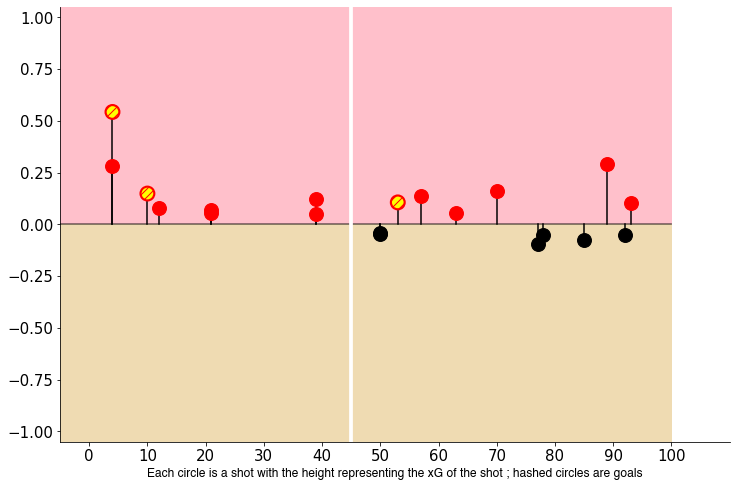

In [36]:
fig ,ax = plt.subplots(figsize=(12,8))
# -- Clean up the axes
ax.set_ylim(-1.05,1.05)
ax.set_xlim(-5,110)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_ = [ x for x in range(0,105,10)]
ax.yaxis.set_ticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.xaxis.set_ticks(x_)

ax.plot([-5,100], [0,0], color='black', lw=1.75, alpha=0.5)
ax.plot([45,45], [-1.05,1.05], color='white', lw=3.75, alpha=1)

ax.tick_params(labelsize=15)

ax.fill_between(
        x=[-5,100], y1=[0], y2=[1.05],
        color=("pink"), alpha=1, zorder=1,
        hatch="......."
    )
ax.fill_between(
        x=[-5,100], y1=[0], y2=[-1.05],
        color="#EFDBB2", alpha=1, zorder=1,
        hatch="......."
    )



for index in range(lena):
    marker = 'o'
    minute = away['minute'].iloc[index]
    xG = away['xG'].iloc[index]
    if away['result'].iloc[index] == 'Goal':
        hatch = '///'
        plt.scatter([minute], [xG + .025], marker=marker, s=190,hatch=hatch, 
            color="yellow", zorder=3, lw=2.15, ec="red")
    else:
        hatch = '/////////////'
        plt.scatter([minute ], [xG + .025], marker=marker, s=190, color="red", zorder=4, lw=1.15)
    plt.plot([minute,minute], [0, xG +.025], zorder=2,color = "black")

    
for index in range(lenh):
    marker = 'o'
    minute = home['minute'].iloc[index]
    xG = home['xG'].iloc[index]
    if home['result'].iloc[index] == 'Goal':
        hatch = '///'
        plt.scatter([minute], [-1*xG - .025], marker=marker, s=190,hatch=hatch, 
            color="#063672", zorder=3, lw=2.15, ec="red")
    else:
        hatch = '/////////////'
        plt.scatter([minute ], [-1*xG - .025], marker=marker, s=190, color="black", zorder=4, lw=1.15)
    plt.plot([minute,minute], [0, -1*xG - .025], zorder=2,color = "#000000")
    
ax.set_xlabel("Each circle is a shot with the height representing the xG of the shot ; hashed circles are goals",c='#000000',fontsize = 12,fontfamily = "Helvetica")
